In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statistics
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
boston = load_boston()


#Creating DFs
feature_matrix = boston.data
feature_names = boston.feature_names
target_matrix = boston.target

c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func

In [2]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:

df = pd.DataFrame(feature_matrix,columns=feature_names)
df['MDEV'] = target_matrix

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston.DESCR

X = df.drop(labels=['MDEV'],axis=1)
y = df['MDEV']


In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape,X_test.shape,X_train.shape[0]+X_test.shape[0]

((354, 13), (152, 13), 506)

In [7]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


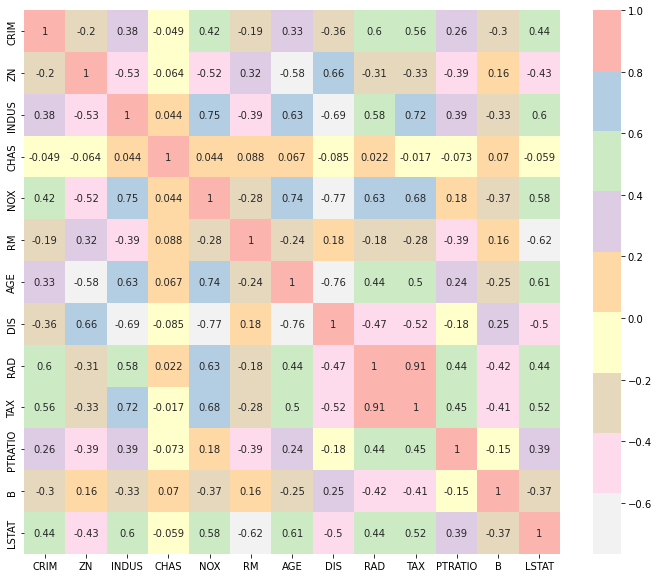

In [11]:
#Creating heat map for better visualization

plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.Pastel1_r)

#plt.savefig('corr.png',trasparent=False)
plt.show()

In [16]:
#Function to get Above threshold data Columns

def Core(dataset, threshold):
    col_corr = set() #Set to add get all columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]#Adding satisfied columns
                col_corr.add(colname)
    return col_corr

In [17]:
#Running the function
corr_features = Core(X_train,0.6)
len(set(corr_features))

6

In [18]:
X_train[corr_features].corr()

,DIS,TAX,RAD,AGE,NOX,LSTAT
DIS,1.000000,-0.519643,-0.467653,-0.761543,-0.765753,-0.501780
TAX,-0.519643,1.000000,0.907455,0.502429,0.683445,0.515905
RAD,-0.467653,0.907455,1.000000,0.440578,0.627188,0.442783
AGE,-0.761543,0.502429,0.440578,1.000000,0.740052,0.606530
NOX,-0.765753,0.683445,0.627188,0.740052,1.000000,0.577154
LSTAT,-0.501780,0.515905,0.442783,0.606530,0.577154,1.000000


In [19]:
#0.6 above feature
corr_features

{'AGE', 'DIS', 'LSTAT', 'NOX', 'RAD', 'TAX'}

In [21]:
corr_features2 = Core(X_train,0.7)
corr_features2

{'AGE', 'DIS', 'NOX', 'TAX'}

In [23]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)#Non selected features

,CRIM,ZN,INDUS,CHAS,RM,PTRATIO,B
329,0.06724,0.0,3.24,0.0,6.333,16.9,375.21
371,9.23230,0.0,18.10,0.0,6.216,20.2,366.15
219,0.11425,0.0,13.89,1.0,6.373,16.4,393.74
403,24.80170,0.0,18.10,0.0,5.349,20.2,396.90
78,0.05646,0.0,12.83,0.0,6.232,18.7,386.40
...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,18.7,396.90
428,7.36711,0.0,18.10,0.0,6.193,20.2,96.73
385,16.81180,0.0,18.10,0.0,5.277,20.2,396.90
308,0.49298,0.0,9.90,0.0,6.635,18.4,396.90


In [24]:
#Performing Correlation test on Santander

df = pd.read_csv('train.csv',nrows=10000)

X = df.drop(labels=['TARGET'],axis=1)
y = df['TARGET']

#Spliting

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


In [25]:
#Loading the VT pass Data
data = pd.read_csv('var-pass.csv')
data.sample(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
5367,231,2,41,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86507.55
437,8125,2,26,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84525.00
5540,11585,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36485.01


In [26]:
corr_features = Core(data,0.9)
corr_features

{'delta_imp_aport_var33_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var6',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_

In [27]:
len(set(corr_features))

156